In [ ]:
# Библиотеки для синтеза данных
import datetime, os # Для подсчета времени и работы с файловой системой
import numpy as np # Для работы с матрицами 
import sys # Для специльного вывода
import matplotlib.pyplot as plt # Для виузализации 
import random # Для генерации случайных чисел
from google.colab import drive
from PIL import Image, ImageOps

# Библиотеки для обучения модели
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Flatten, Dense, Dropout, Conv2DTranspose, Concatenate, Reshape
from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam # Импортируем оптимизатор Adam
from tensorflow.keras import callbacks
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
from google.colab import files # Импортируем Модуль files для работы с файлами
#import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.preprocessing import image # Библиотека от Keras для загрузки изображений
import numpy as np # Импортируем библиотеку numpy
from sklearn.model_selection import train_test_split
import time
import random
import math
import os # Импортируем библиотеку os для раоты с фаловой системой
#from PIL import Image # импортируем модель Image для работы с изображениями
#from google.colab import drive
#import datetime

In [ ]:
# Монтируем наш Google-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Настройка

dbFile = '/content/drive/MyDrive/Colab\ Notebooks/Machine_learning/Datasets/cars.zip'  # Файл с исходными изображениями
outDir = '/content/cars_dataset'          # Директория, куда складываем все получившиеся в ходе обработки файлы
db     = '/content/cars'

# Переменная для перевода в вероятности (One Hot Encoding)
labels = {} # Используем словарь
labels['Ferrari']  = [1,0,0]
labels['Mercedes'] = [0,1,0]
labels['Renault']  = [0,0,1]

In [ ]:
# Трансформации

# Поворот изображения в градусах
rotation = [-9, -6, 0, 6, 9]

# Приближене изображени в процентах
zoom = [0, 6, 12]

# Размер финального изображения
final_size = [ 192, 108 ]

In [ ]:
# Удаляем выходную папку и создаем новую
!rm -rf {outDir}
!rm -rf {db}

In [ ]:
# Распаковываем файл
!unzip -q {dbFile} -d {db}

In [ ]:
# Создаем папку, куда будем складывать изображения
os.mkdir(outDir)
# Создаем подпапки
os.mkdir(outDir+"/Ferrari")
os.mkdir(outDir+"/Mercedes")
os.mkdir(outDir+"/Renault")

In [ ]:
# Пробегаемся по всем изображениям и генерим новые

dir_list = os.listdir(db)
for d in dir_list: #Проход по папкам
  cfile = 0
  fid = os.listdir(db+"/"+d)
  for f in fid:
    if '.png' not in f:
      continue

    cfile += 1
    print(cfile, "из", len(fid), "->",f)

    file_car = db+"/"+d+"/"+f # Получаем путь к изображению

    # Сохраняем файл по пути
    img_car = Image.open(file_car)

    width  = img_car.size[0]    # Получаем ширину
    height = img_car.size[1]    # Получаем высоту

                    # Производим трансформации

    # Делаем поворот с наложением на существующую картинку
    img_car_t = img_car.copy()
    for r in rotation:
      if r != 0:
        
        img_car_tb = img_car_t.copy()
        img_car_tb = img_car_tb.convert('RGBA')

        # сохраняем неповернутое изображение как задний фон
        img_background_car = img_car_tb.copy()

        # Поворачиваем изображение
        img_car_tb = img_car_tb.rotate(r)

        img_background_car.paste(img_car_tb, (0,0), img_car_tb)

        # Конвертируем обратно в изображение без альфа-канала
        img_car_tr = img_background_car.convert('RGB')
      else:
        img_car_tr = img_car_t.copy()

    for z in zoom:
      if z != 0:
        newsize = [ int(width + width/100*z) , int(height + height/100*z) ]
        img_car_trz = img_car_tr.resize(newsize)
      else:
        newsize = [ width, height ]
        img_car_trz = img_car_tr.copy()


      p1 = (newsize[0] - width) // 2
      p2 = (newsize[1] - height) // 2
      p3 = p1 + width
      p4 = p2 + height

      img_car_trzc = img_car_trz.crop((p1, p2, p3, p4))

      fname_car = 'z' + str(z) + "_r" + str(r) + "_" + f
      fpath_car = outDir + "/" + d + "/" + fname_car

      img_car_trzc.save(fpath_car, "PNG")


1 из 1180 -> car__74.png
2 из 1180 -> car__879.png
3 из 1180 -> car__301.png
4 из 1180 -> car__684.png
5 из 1180 -> car__800.png
6 из 1180 -> car__645.png
7 из 1180 -> car__83.png
8 из 1180 -> car__425.png
9 из 1180 -> car__1338.png
10 из 1180 -> car__529.png
11 из 1180 -> car__424.png
12 из 1180 -> car__715.png
13 из 1180 -> car__1157.png
14 из 1180 -> car__706.png
15 из 1180 -> car__755.png
16 из 1180 -> car__1250.png
17 из 1180 -> car__316.png
18 из 1180 -> car__265.png
19 из 1180 -> car__1008.png
20 из 1180 -> car__1036.png
21 из 1180 -> car__1070.png
22 из 1180 -> car__1277.png
23 из 1180 -> car__1150.png
24 из 1180 -> car__94.png
25 из 1180 -> car__1053.png
26 из 1180 -> car__822.png
27 из 1180 -> car__1041.png
28 из 1180 -> car__1176.png
29 из 1180 -> car__256.png
30 из 1180 -> car__0.png
31 из 1180 -> car__122.png
32 из 1180 -> car__1.png
33 из 1180 -> car__1210.png
34 из 1180 -> car__543.png
35 из 1180 -> car__1208.png
36 из 1180 -> car__1372.png
37 из 1180 -> car__112.png
38 

In [ ]:
# Знакомая нам функция загрузки изображения
def load_image(file_name):
  image = Image.open(file_name) # Загружаем изображение из файла

  image = image.convert('RGB')  # Приводим изображение к режиму черно-белого изображения 8 бит (0 ... 256)

  image_width  = image.size[0]  # Получаем ширину
  image_height = image.size[1]  # Получаем высоту

  image_data = image.getdata()          # Получаем данные картинки
  image_data = np.array(image_data)     # Преобразуем в np массив

  image = image_data.reshape(image_height, image_width, 3)  # Решейпим изображение для цветного варианта
  if (image_height != 108) | (image_width != 192):
    print(file_name, "!!!!!!!!!!!!!!")

  return image # Возвращаем трехмерный массив с пикселями

In [ ]:
# Формируем наш датасет

image_list = [] #Список путей ко всем изображениям

for label in labels.keys():
  flist = os.listdir(outDir + "/" + label)
  print (label, '->', len(flist), 'изображений')
  for image_name in flist:
    if ".png" not in image_name:
      continue
    image_path = outDir + "/" + label + "/" + image_name
    image_list.append(image_path)

Ferrari -> 3270 изображений
Mercedes -> 3483 изображений
Renault -> 3540 изображений


In [ ]:
print()
print("Пример путей к файлам в массиве:")
print(image_list[0:3])

# перемешаем значения в датасете
random.shuffle(image_list)

print()
print("Пример путей к файлам в массиве после перемешивания:")
print(image_list[0:3])

print()


Пример путей к файлам в массиве:
['/content/cars_dataset/Ferrari/z0_r9_car_Ferrari__656.png', '/content/cars_dataset/Ferrari/z6_r9_car_Ferrari__880.png', '/content/cars_dataset/Ferrari/z0_r9_car_Ferrari__404.png']

Пример путей к файлам в массиве после перемешивания:
['/content/cars_dataset/Renault/z0_r9_car__211.png', '/content/cars_dataset/Ferrari/z0_r9_car_Ferrari__237.png', '/content/cars_dataset/Ferrari/z0_r9_car_Ferrari__12.png']



In [ ]:
x_train = []
y_train = []

c = 1
flen = len(image_list)

for image_name in image_list:
  img = load_image(image_name)
  label = image_name.split('/')[3]
  x_train.append(img)
  y_train.append(labels[label]) # Добавляем верный ответ соответствующий изображению в формате ОНЕ
  print(c, flen, image_name) # Для отслеживания процесса загрузки
  c += 1

x_train = np.array(x_train)
y_train = np.array(y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
5294 10293 /content/cars_dataset/Ferrari/z6_r9_car_Ferrari__223.png
5295 10293 /content/cars_dataset/Mercedes/z6_r9_car__497.png
5296 10293 /content/cars_dataset/Renault/z0_r9_car__66.png
5297 10293 /content/cars_dataset/Renault/z12_r9_car__385.png
5298 10293 /content/cars_dataset/Mercedes/z6_r9_car__739.png
5299 10293 /content/cars_dataset/Ferrari/z12_r9_car_Ferrari__1301.png
5300 10293 /content/cars_dataset/Mercedes/z12_r9_car__1251.png
5301 10293 /content/cars_dataset/Renault/z12_r9_car__679.png
5302 10293 /content/cars_dataset/Renault/z0_r9_car__287.png
5303 10293 /content/cars_dataset/Renault/z12_r9_car__856.png
5304 10293 /content/cars_dataset/Renault/z12_r9_car__1026.png
5305 10293 /content/cars_dataset/Mercedes/z0_r9_car__621.png
5306 10293 /content/cars_dataset/Renault/z12_r9_car__1002.png
5307 10293 /content/cars_dataset/Renault/z12_r9_car__376.png
5308 10293 /content/cars_dataset/Mercedes/z12_r9_car__538.png

In [ ]:
# Вывод размерности обучающей выборки
print("Размерность x_train", x_train.shape)
print()
print("Размерность y_train", y_train.shape)

Размерность x_train (10293, 108, 192, 3)

Размерность y_train (10293, 3)


In [ ]:
# Разобъем обучающую выборку на выборки

# Проверочная выборка
x_val = x_train[9000:10000]
y_val = y_train[9000:10000]

# Тестовая выборка
x_test = x_train[10000:]
y_test = y_train[10000:]

# Обучающая выборка
x_train = x_train[0:9000]
y_train = y_train[0:9000]

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(9000, 108, 192, 3)
(9000, 3)

Проверочная выборка:
(1000, 108, 192, 3)
(1000, 3)

Тестовая выборка:
(293, 108, 192, 3)
(293, 3)


In [ ]:
# задаём batch_size
batch_size = 8*6

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(108, 192, 3), name="bn1"))
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
# Первый слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer1"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn2"))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer3"))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer4"))
# Второй слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer2"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn3"))
# Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer5"))
# Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer6"))
# Третий слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
# Слой регуляризации Dropout
model.add(Dropout(0.25, name="Dropout-layer3"))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(3, activation='softmax', name = "labels"))

# Компилируем сеть
#model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn1 (BatchNormalization)    (None, 108, 192, 3)       12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 108, 192, 32)      896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 108, 192, 32)      9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 54, 96, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 54, 96, 32)        0         
                                                                 
 bn2 (BatchNormalization)    (None, 54, 96, 32)        128       
                                                                 
 Conv2D-layer3 (Conv2D)      (None, 54, 96, 64)        1

Epoch 1/20
188/188 [==============================] - 19s 57ms/step - loss: 1.2502 - accuracy: 0.3752 - val_loss: 1.0759 - val_accuracy: 0.4030
Epoch 2/20
188/188 [==============================] - 9s 50ms/step - loss: 0.9820 - accuracy: 0.5200 - val_loss: 1.0457 - val_accuracy: 0.4040
Epoch 3/20
188/188 [==============================] - 9s 50ms/step - loss: 0.8030 - accuracy: 0.6346 - val_loss: 0.7923 - val_accuracy: 0.6430
Epoch 4/20
188/188 [==============================] - 10s 51ms/step - loss: 0.7268 - accuracy: 0.6788 - val_loss: 0.7917 - val_accuracy: 0.6570
Epoch 5/20
188/188 [==============================] - 9s 50ms/step - loss: 0.6535 - accuracy: 0.7194 - val_loss: 0.7436 - val_accuracy: 0.7120
Epoch 6/20
188/188 [==============================] - 9s 50ms/step - loss: 0.5817 - accuracy: 0.7634 - val_loss: 0.5964 - val_accuracy: 0.7550
Epoch 7/20
188/188 [==============================] - 10s 51ms/step - loss: 0.5109 - accuracy: 0.7909 - val_loss: 0.5114 - val_accuracy: 0.7

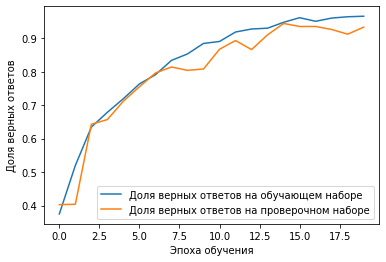

In [ ]:
# Обучаем сеть на наших данных
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()